In [10]:
from ClasificadorRegresionLogistica import ClasificadorRegresionLogistica
from ClasificadorKNN import ClasificadorKNN
from datos import Datos 
from plotModel import plotModel 
from EstrategiaParticionado import ValidacionCruzada
import matplotlib.pyplot


regresion = ClasificadorRegresionLogistica(100,1)
vecinos = ClasificadorKNN(3)
example3 = Datos('../ficheros/ConjuntosDatos/example3.data',True)
example4 = Datos('../ficheros/ConjuntosDatos/example4.data',True)
wdbc = Datos('../ficheros/ConjuntosDatos/wdbc.data',True)


def graficar_frontera(dataset,clf):
    %matplotlib inline
    particiones = ValidacionCruzada(5).creaParticiones(dataset)
    ii = particiones[-1].indicesTest
    ii_train = particiones[-1].indicesTrain
    datosTrain = dataset.datos[ii_train]
    clf.entrenamiento(datosTrain,dataset.nombreAtributos,dataset.diccionarios)
    plotModel(dataset.datos[ii,0], dataset.datos[ii,1],dataset.datos[ii,-1] != 0, clf, "Frontera", dataset.diccionarios)


<h2>Apartado 1</h2><br/>
<p> Resultados de Naive-Bayes obtenidos por scikit-learn en los conjuntos de datos de la práctica 1 y análisis comparativo con los resultados obtenidos por la propia implementación en python.
</p>


<p>
En primer lugar, vamos a mostrar el error obtenido en tanto por uno por la implementación de NB extraídos de la práctica anterior y los recopilados por scikit-learn para los conjuntos de datos <strong>tic-tac-toe</strong>, <strong>wine</strong>, <strong>credit approval</strong> y <strong>digits</strong><br />. 
</p>
<table>
    <tr>
        <td></td>
        <th style="text-align:center">tic-tac-toe</th>
        <th style="text-align:center">wine</th>
        <th style="text-align:center">crx</th>
        <th style="text-align:center">digits</th>
    </tr>
    <tr>
        <th style="text-align:center">Naïve-Bayes</th>
        <td>0.35</td>
        <td>0.67</td>
        <td>0.44</td>
        <td>0.93</td>
    </tr>
    <tr>
        <th>NB + Laplace</th>
        <td>0.35</td>
        <td>0.66</td>
        <td>0.44</td>
        <td>0.94</td>
    </tr>
    <tr>
        <th>GaussianNB</th>
        <td>0.26</td>
        <td>0.67</td>
        <td>0.15</td>
        <td>0.8</td>
    </tr>
    <caption style="text-align:center">Resultados en tanto por uno</caption>
</table>
<br />

<h2>Apartado 2</h2>
<p><strong>
Resultados de la clasificación mediante vecinos próximos (implementación original) para diferentes valores de vecindad en los conjuntos de datos propuestos. Comparación con los resultados proporcionados por scikit-learn. Obtener los resultados tanto para datos normalizados como sin normalizar.
</strong></p>



<p>
En primer lugar vamos a mostrar la tabla de resultados en tanto por uno, representado los datos en tanto normalizados, los datos sin normalizar y la implementación de scikit-learn. Despuén representaremos gráficamente los conjuntos de datos 'example3' y 'example4'
</p>

<table>
    <tr>
        <td></td>
        <th style="text-align:center">example3</th>
        <th style="text-align:center">example4</th>
        <th style="text-align:center">wine</th>
        <th style="text-align:center">wdbc</th>
        <th style="text-align:center">digits</th>      
   </tr>
   <tr>
       <th>Scikit-learn</th>
       <td style="text-align:center">0.98</td>
       <td style="text-align:center">0.97</td>
       <td style="text-align:center">0.73</td>
       <td style="text-align:center">0.93</td>
       <td style="text-align:center">0.9</td>
   </tr>
    <tr>
        <th>Datos Normalizados</th>
       <td style="text-align:center">0.98</td>
       <td style="text-align:center">1</td>
       <td style="text-align:center">0.95</td>
       <td style="text-align:center">0.96</td>
       <td style="text-align:center">0.85</td>
    </tr>
    <tr>
       <th>No normalizados</th>
       <td style="text-align:center">0.97</td>
       <td style="text-align:center">0.95</td>
       <td style="text-align:center">0.72</td>
       <td style="text-align:center">0.93</td>
       <td style="text-align:center">0.9</td>
    </tr>
    <caption style="text-align:center">Resultados de clasificación del algoritmo KNN en tanto por uno </caption>
</table>
<br/>
<br/>

<p>
Las diferencias entre la versión de referencia y la versión de implementación con la normalización aplicada y con la normalización sin aplicar, son practicamente nulas excepto en el conjunto de datos wine y en el conjuntos de datos example4, donde los resultados de sklearn y los resultados de la versión sin normalización son notablemente peores.
</p>
<p>
Esta diferencia entre la implementación aplicando normalización y la versión de sklearn, me lleva a concluir que, con los parámetros por defecto ( menos el número de vecinos) el algoritmo de sklearn no realiza ninguna clase de normalización.
</p>
<p>
Cómo tendencia, se puede observar en los notebook donde he realizado las pruebas, que a mayor número de vecinos el porcentaje de acierto no sólo no subía sino que en algunos casos incluso descendía, ya que empieza a coger numerosos vecinos que estan a una distancia lejana y pertenecen a clases distintas y esto en algunos casos ha producido una distorsión en la clasificación.
</p>

<p>
Por último vamos a representar gráficamente las fronteras de decisión para los conjuntos de datos 'example3' y 'example4' 
</p>

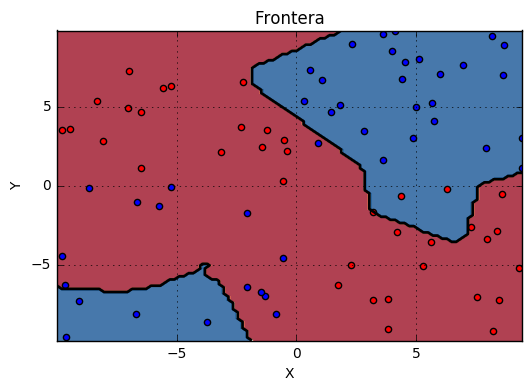

In [5]:
graficar_frontera(example3,vecinos)

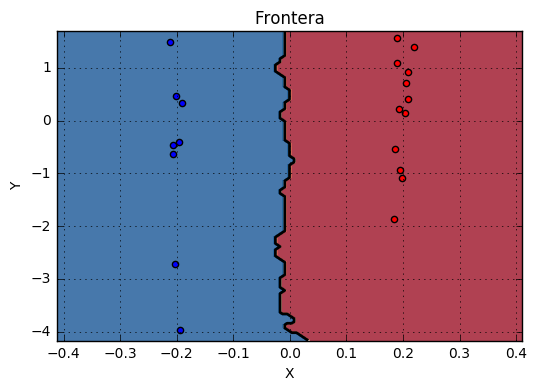

In [6]:
graficar_frontera(example4,vecinos)

<h2>Apartado 3</h2>
<p>
Resultados de la clasificación mediante regresión logística en el conjunto de datos propuesto. Comparación con los resultados proporcionados por scikit-learn. <br />
</p>
<p>
En esta tabla quedan reflejados los resultados recogidos tanto de mi implementación como del algoritmo de scikit-learn. <br/>
</p>

<table>
    <tr>
        <td></td>
        <th style="text-align:center">example3</th>
        <th style="text-align:center">example4</th>
        <th style="text-align:center">wdbc</th>
    </tr>
    <tr>
        <th>Versión implementada</th>
        <td>0.462</td>
        <td>1.0</td>
        <td>0.776</td>        
    </tr>
    <tr>
        <th>Versión scikit-learn </th>
        <td>0.47</td>
        <td>1.0</td>
        <td>0.956</td>
    </tr>
    <caption style="text-align:center">Tasas de acierto en tanto por uno</caption>
</table>

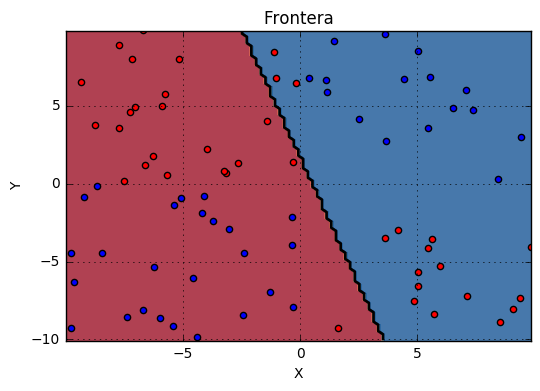

In [7]:
graficar_frontera(example3,regresion)

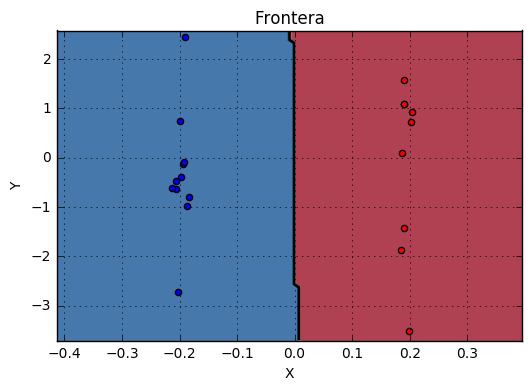

In [8]:
graficar_frontera(example4,regresion)